## 说明
简单分析by@寒小阳<br>
以下的分析内容仅供参考，如有更好的分析方式，欢迎补充，谢谢

In [1]:
%matplotlib inline
import pandas as pd
import pylab, math
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.font_manager as fm
zhfont = fm.FontProperties(fname='msyh.ttf')
import re
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 选项
这是一个python的notebook，也可以根据自己的喜好选择R的。File->New Notebook中有选项

In [75]:
delay = pd.read_csv('video_process_delay.csv')
retain = pd.read_csv('user_retention.csv')

# A 基础分析
* 查看数据的前8行
* 查看数据的相关信息（列名、维度、缺失、统计信息）
* 平均每个用户看多少个video
* 每个用户看video个数的分布(画图)
* 用户看视频的个数和留存的关系（统计和画图）

In [65]:
delay.head(8)

,user,video,delay
0,3,0,2275
1,3,1,839
2,5,2,119
3,6,3,70
4,9,4,66
5,10,5,198
6,11,6,348
7,12,7,93


In [66]:
delay.columns

Index(['user', 'video', 'delay'], dtype='object')

In [67]:
delay.shape

(282801, 3)

In [68]:
delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282801 entries, 0 to 282800
Data columns (total 3 columns):
user     282801 non-null int64
video    282801 non-null int64
delay    282801 non-null int64
dtypes: int64(3)
memory usage: 6.5 MB


In [69]:
delay.describe()

,user,video,delay
count,282801.000000,282801.000000,282801.000000
mean,88253.622151,141400.000000,505.997468
std,49080.766603,81637.761076,4272.765087
min,0.000000,0.000000,3.000000
25%,46107.000000,70700.000000,79.000000
50%,89574.000000,141400.000000,236.000000
75%,131667.000000,212100.000000,629.000000
max,168935.000000,282800.000000,857526.000000


In [70]:
#平均每个用户看多少个video

#求出总的观看视频数/总的用户数

len(delay["video"].unique()) / len(delay["user"].unique())

1.6740126438414547

In [71]:
plt.rcParams["figure.figsize"] = (10,8)

Text(0, 0.5, 'user number')

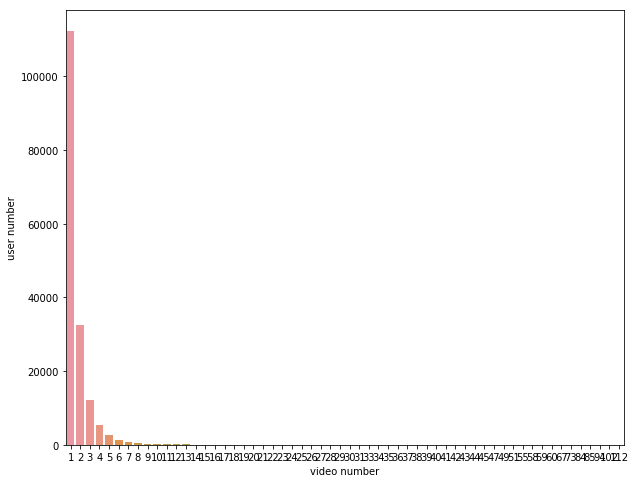

In [85]:
# 每个用户看video个数的分布(画图)
#先求出每个用户看的视频个数

df = delay.groupby(by="user").agg({"video":"count"})
df = df.rename(columns={"video":"video_number"})
sns.countplot(x = "video_number",data=df)
plt.xlabel("video number")
plt.ylabel("user number")

 从图来看的话，大部分用户观看的视频数量在5个以内

In [86]:
#用户看视频的个数和留存的关系（统计和画图）

# 把表格合并
df1 = pd.merge(df,retain,on="user")
df1.head()

,user,video_number,retain
0,0,2,1
1,1,3,1
2,2,1,0
3,3,2,1
4,4,1,1


In [87]:
# 求出视频个数对应的留存率
df1["count"] = 1
df1 = df1.groupby("video_number").agg({"retain":"sum","count":"sum"})



,retain,count
video_number,,
1,35460,112447
2,15242,32564
3,6875,12113
4,3317,5382
5,1703,2563


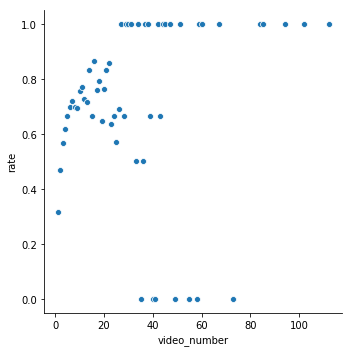

In [88]:
df1 = df1.reset_index()

df1["rate"] = df1["retain"] / df1["count"]

sns.relplot(x = "video_number",y="rate",data=df1)

在30个视频以内，用户的留存率随着观看视频增加而增加

# B. 基础分析，回答如下问题
* 平均留存率是多少
* 系统处理延迟(delay)的分布图。
* 对延迟按等频做100分桶，每个桶内有多少用户，同时作图表示一下分布
* 延迟的平均值，P50，P90，P95，P99分别是多少，是否可以用图表达
* 对延迟按照每100分桶，每个桶的作者留存率是多少？画图

(网上搜索“pandas 回归”等关键词可以找到很多教程，例如 http://lib.csdn.net/article/machinelearning/35051)

In [89]:
df1.rate.mean()

0.7069110878151486

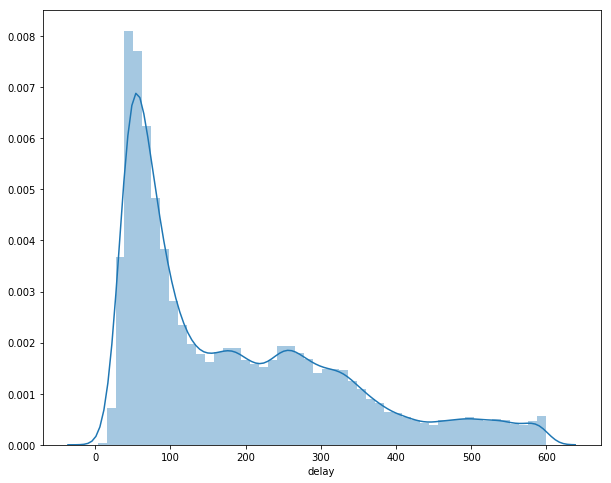

In [105]:
#系统处理延迟(delay)的分布图
sns.distplot(delay["delay"][delay["delay"] < 600],kde=True)


In [ ]:
#对延迟按等频做100分桶，每个桶内有多少用户，同时作图表示一下分布


# C. 相关性分析
(提示，两张表的链接可以使用pandas的merge函数。在这个notebook里就是pd.merge。细节可以google)
1. 平均延迟每降低100，留存会提升或者降低多少？
2. 如果降低平均延迟，会改变留存吗？

# D.拓展分析
请问从上述数据，你还可以分析出什么有用的信息吗？请自由发挥

In [30]:
# 其他分析
